## [mjo_cross_segment](https://www.ncl.ucar.edu/Document/Functions/Built-in/mjo_cross_segment.shtml): Calculate space-time cross spectrum for a single time segment

Compute the fast fourier transform to get the power and cross-spectra for a one time segement

Accepts two inputs: X and Y

- X: Three dimensional variable array for (time, lat, lon)
- Y: Three dimensional variable array for (time, lat, lon)

> Longitudes should be global while latitudes should only span the south-north region of interest. The size of the 'time' dmension should be the size of the desired segment length (for example: daily maen data, the size ofthe time dimension is typically 96, 128, 256, etc...)

Returns: three dimensional array (16, wavenumber, frequency) containing the 16 cross spectral quantities associated with the specific time segment

Power Spectra for X:
- ( 0,:,:)  -  symmetric power spectrum of x
- ( 1,:,:)  -  asymmetric power spectrum of x

Power Spectra for Y:
- ( 2,:,:)  -  symmetric power spectrum of y
- ( 3,:,:)  -  asymmetric power spectrum of y

Co-spectra between X and Y
- ( 4,:,:)  -  symmetric cospectrum
- ( 5,:,:)  -  asymmetric cospectrum

Quadrature spectra between X and Y
- ( 6,:,:)  -  symmetric quadrature spectrum
- ( 7,:,:)  -  asymmetric quadrature spectrum
- ( 8,:,:)  -  symmetric coherence-squared spectrum
- ( 9,:,:)  -  asymmetric coherence-squared spectrum

Phase Spectra: (computed via `mjo_cross_coh2pha`)
- (10,:,:)  -  symmetric phase spectrum
- (11,:,:)  -  asymmetric phase spectrum
- (12,:,:)  -  symmetric component-1 phase spectrum
- (13,:,:)  -  asymmetric component-1 phase spectrum
- (14,:,:)  -  symmetric component-2 phase spectrum
- (15,:,:)  -  asymmetric component-2 phase spectrum

Where coordinate frequencies span 0.0 to 0.5 and coordinate wavenumbers span -M/2 and M/2 where M is the number of longitudes

Cross Spectrum (cross-spectral density, product per unit frequency)

Fourier transforms of x and y (X(f) and Y(f)) with the complex conjugate of x(f). Produces the real and imginary parts (co-spectrum and quadrature spectrum)

- [See more](https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum_cross.html)

In [1]:
# https://github.com/NOAA-PSL/tropical_diagnostics/blob/a2090652a7ea2600e8bd271271069df7e85ed1bf/tropical_diagnostics/spacetime.py#L40

import numpy as np # numpy.fft.fft2: compute the 2D discrete fourier transform
import pandas as pd
import xarray as xr # setup test data
import matplotlib.pyplot as plt # plot test data

In [2]:
# setup data
time = pd.date_range("2025-01-01", periods=10) # First ten days of the year
lat = np.linspace(-90, 90, 10) # 6 latitude positions
lon = np.linspace(-180, 180, 5) # 5 longitude positions

# random temperature
mean_temp = 15
variation = 8
temp = mean_temp + variation * np.random.randn(len(time), len(lat), len(lon))

In [3]:
# setup xarray dataset

dataset = xr.Dataset(
    { "temperature": (["time", "lat", "lon"], temp) },
    coords = {"time": time, "lat": lat, "lon": lon},
    attrs = {"description": "testing data with random temperature data", "units": "Celsius"}
    )

dataset.to_netcdf("sample_temp_data.nc") # save to NetCDF file

In [4]:
# load data 
dataset_loaded = xr.open_dataset("sample_temp_data.nc")
dataset_loaded

<xarray.Dataset> Size: 4kB
Dimensions:      (time: 10, lat: 10, lon: 5)
Coordinates:
  * time         (time) datetime64[ns] 80B 2025-01-01 2025-01-02 ... 2025-01-10
  * lat          (lat) float64 80B -90.0 -70.0 -50.0 -30.0 ... 50.0 70.0 90.0
  * lon          (lon) float64 40B -180.0 -90.0 0.0 90.0 180.0
Data variables:
    temperature  (time, lat, lon) float64 4kB ...
Attributes:
    description:  testing data with random temperature data
    units:        Celsius

In [5]:
# save data as csv to be viewable
dataset_loaded.to_dataframe().to_csv("sample_temp_data.csv")

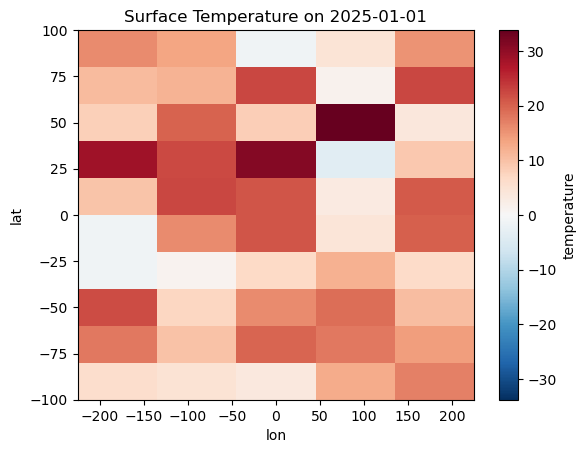

In [6]:
# View Randomly Generated Data
# Plot temperature for the first day of the year
day1_temp = dataset_loaded['temperature'].sel(time='2025-01-01')
day1_temp.plot()
plt.title('Surface Temperature on 2025-01-01')
plt.show()

In [10]:
dataset_loaded = xr.open_dataset("SpaceTimeSpectra_symm_2spd.nc")
dataset_loaded


<xarray.Dataset> Size: 3MB
Dimensions:  (var: 8, freq: 181, wnum: 241)
Coordinates:
  * freq     (freq) float64 1kB -1.0 -0.9889 -0.9778 ... 0.9778 0.9889 1.0
  * wnum     (wnum) int64 2kB -120 -119 -118 -117 -116 ... 116 117 118 119 120
  * var      (var) int64 64B 0 1 2 3 4 5 6 7
Data variables:
    STC      (var, freq, wnum) float64 3MB ...

In [7]:
def mjo_cross_segment(X, Y):
    pass